In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mlb=pd.read_csv('mlbsalaries.csv')

In [3]:
mlb.head()

Year           Player   Salary           Position                Team
0  1988        Mike Witt  1400000            Pitcher  Los Angeles Angels
1  1988  George Hendrick   989333         Outfielder  Los Angeles Angels
2  1988      Chili Davis   950000         Outfielder  Los Angeles Angels
3  1988    Brian Downing   900000  Designated Hitter  Los Angeles Angels
4  1988        Bob Boone   883000            Catcher  Los Angeles Angels

In [4]:
mlb.tail()

Year          Player  Salary        Position              Team
19538  2011  Gustavo Molina  455000         Catcher  New York Yankees
19539  2011       Ivan Nova  432900         Pitcher  New York Yankees
19540  2011    Colin Curtis  420400      Outfielder  New York Yankees
19541  2011   Eduardo Nunez  419300       Shortstop  New York Yankees
19542  2011   Reegie Corona  414000  Second Baseman  New York Yankees

In [5]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19543 entries, 0 to 19542
Data columns (total 5 columns):
Year        19543 non-null int64
Player      19543 non-null object
Salary      19543 non-null int64
Position    19543 non-null object
Team        19543 non-null object
dtypes: int64(2), object(3)
memory usage: 763.5+ KB


In [6]:
mlb_by_year = mlb.groupby('Year')

In [7]:
for k,group in mlb_by_year:
    print(k)
    print(group.info())
    print

1988
<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Data columns (total 5 columns):
Year        686 non-null int64
Player      686 non-null object
Salary      686 non-null int64
Position    686 non-null object
Team        686 non-null object
dtypes: int64(2), object(3)
memory usage: 32.2+ KB
None
1989
<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 686 to 1395
Data columns (total 5 columns):
Year        710 non-null int64
Player      710 non-null object
Salary      710 non-null int64
Position    710 non-null object
Team        710 non-null object
dtypes: int64(2), object(3)
memory usage: 33.3+ KB
None
1990
<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 1396 to 2367
Data columns (total 5 columns):
Year        972 non-null int64
Player      972 non-null object
Salary      972 non-null int64
Position    972 non-null object
Team        972 non-null object
dtypes: int64(2), object(3)
memory usage: 45.6+ KB
None
1991
<class 'pandas.core

In [8]:
mlb_by_year.agg(np.median).head()

Salary
Year        
1988  235000
1989  300000
1990  190000
1991  500000
1992  425000

In [10]:
mlb_by_year.agg(sum).head()

Salary
Year           
1988  294817820
1989  350915282
1990  454222925
1991  630008474
1992  783894948

In [12]:
mlb_by_year.median().head()

Salary
Year        
1988  235000
1989  300000
1990  190000
1991  500000
1992  425000

In [13]:
mlb.groupby('Year').median().head()

Salary
Year        
1988  235000
1989  300000
1990  190000
1991  500000
1992  425000

In [15]:
t = (group.sort_values(by='Salary', ascending=False)[:1] for yr,group in mlb_by_year)

In [16]:
t

<generator object <genexpr> at 0x000002669081AC78>

In [17]:
topsalaries = pd.DataFrame()

In [18]:
for line in t:
    topsalaries = topsalaries.append(line)

In [19]:
topsalaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 321 to 19513
Data columns (total 5 columns):
Year        24 non-null int64
Player      24 non-null object
Salary      24 non-null int64
Position    24 non-null object
Team        24 non-null object
dtypes: int64(2), object(3)
memory usage: 1.1+ KB


In [20]:
topsalaries

Year             Player    Salary           Position  \
321    1988        Gary Carter   2360714            Catcher   
908    1989     Orel Hershiser   2766666            Pitcher   
1580   1990        Robin Yount   3200000         Outfielder   
2590   1991  Darryl Strawberry   3800000         Outfielder   
3441   1992      Bobby Bonilla   6100000         Outfielder   
4214   1993      Bobby Bonilla   6200000         Outfielder   
4977   1994      Bobby Bonilla   6300000      Third Baseman   
6068   1995      Cecil Fielder   9237500      First Baseman   
6840   1996      Cecil Fielder   9237500      First Baseman   
7666   1997       Albert Belle  10000000         Outfielder   
8090   1998     Gary Sheffield  10000000         Outfielder   
9067   1999       Albert Belle  11949794         Outfielder   
9743   2000     Kevin J. Brown  15714286            Pitcher   
10903  2001     Alex Rodriguez  22000000          Shortstop   
11752  2002     Alex Rodriguez  22000000          Shortstop   
12589  2003     Alex Rodriguez  22000000          Shortstop   
13497  2004      Manny Ramirez  22500000         Outfielder   
14499  2005     Alex Rodriguez  26000000      Third Baseman   
15320  2006     Alex Rodriguez  21680727      Third Baseman   
16167  2007       Jason Giambi  23428571  Designated Hitter   
17023  2008     Alex Rodriguez  28000000      Third Baseman   
17846  2009     Alex Rodriguez  33000000      Third Baseman   
18675  2010     Alex Rodriguez  33000000      Third Baseman   
19513  2011     Alex Rodriguez  32000000      Third Baseman   

                      Team  
321          New York Mets  
908    Los Angeles Dodgers  
1580     Milwaukee Brewers  
2590   Los Angeles Dodgers  
3441         New York Mets  
4214         New York Mets  
4977         New York Mets  
6068        Detroit Tigers  
6840        Detroit Tigers  
7666     Chicago White Sox  
8090       Florida Marlins  
9067     Baltimore Orioles  
9743   Los Angeles Dodgers  
10903        Texas Rangers  
11752        Texas Rangers  
12589        Texas Rangers  
13497       Boston Red Sox  
14499     New York Yankees  
15320     New York Yankees  
16167     New York Yankees  
17023     New York Yankees  
17846     New York Yankees  
18675     New York Yankees  
19513     New York Yankees

In [21]:
ts = topsalaries[['Year','Salary']]

In [22]:
ts

Year    Salary
321    1988   2360714
908    1989   2766666
1580   1990   3200000
2590   1991   3800000
3441   1992   6100000
4214   1993   6200000
4977   1994   6300000
6068   1995   9237500
6840   1996   9237500
7666   1997  10000000
8090   1998  10000000
9067   1999  11949794
9743   2000  15714286
10903  2001  22000000
11752  2002  22000000
12589  2003  22000000
13497  2004  22500000
14499  2005  26000000
15320  2006  21680727
16167  2007  23428571
17023  2008  28000000
17846  2009  33000000
18675  2010  33000000
19513  2011  32000000

In [23]:
ts = ts.set_index('Year')

In [24]:
ts

Salary
Year          
1988   2360714
1989   2766666
1990   3200000
1991   3800000
1992   6100000
1993   6200000
1994   6300000
1995   9237500
1996   9237500
1997  10000000
1998  10000000
1999  11949794
2000  15714286
2001  22000000
2002  22000000
2003  22000000
2004  22500000
2005  26000000
2006  21680727
2007  23428571
2008  28000000
2009  33000000
2010  33000000
2011  32000000

In [25]:
ts.plot()

In [26]:
mlb_by_year['Salary'].median().plot()

In [27]:
mlb_by_year['Salary'].max().plot()

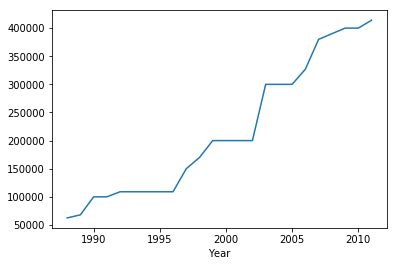

In [28]:
mlb_by_year['Salary'].min().plot()

In [29]:
titanic = pd.read_csv('train.csv')

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

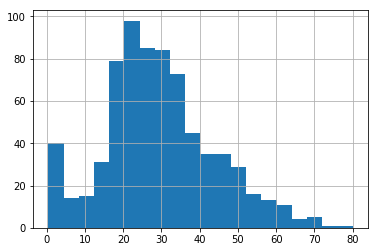

In [32]:
titanic.Age.hist(bins=20);

In [33]:
titanic_by_gender=titanic.groupby('Sex')

In [35]:
titanic_by_gender.Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [36]:
titanic_by_gender.Age.describe()

count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0

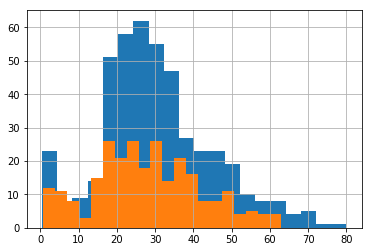

In [37]:
titanic_by_gender.get_group('male').Age.hist(bins=20)
titanic_by_gender.get_group('female').Age.hist(bins=20)

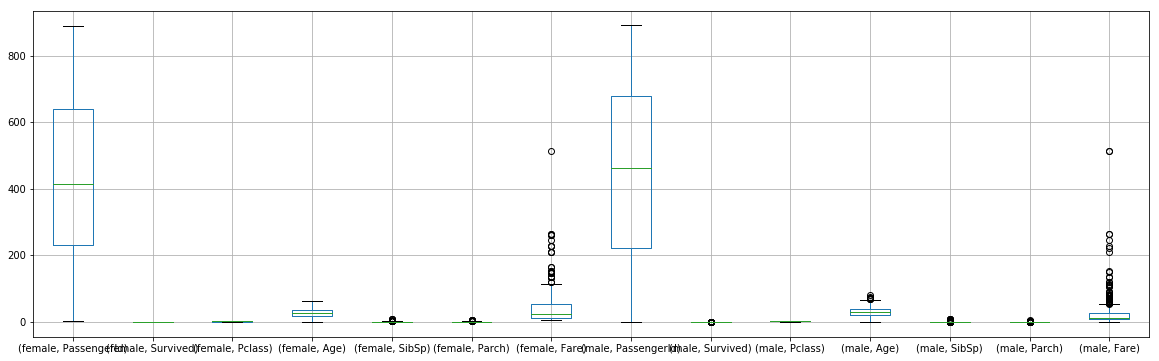

In [38]:
fig = plt.figure(figsize=(20,6))
titanic_by_gender.boxplot('Age',return_type='dict');

In [39]:
titanic_by_gender.size()

Sex
female    314
male      577
dtype: int64

In [40]:
titanic.groupby(['Sex','Pclass']).median().head()

PassengerId  Survived   Age  SibSp  Parch      Fare
Sex    Pclass                                                     
female 1             447.0       1.0  35.0    0.0    0.0  82.66455
       2             439.5       1.0  28.0    0.0    0.0  22.00000
       3             376.0       0.5  21.5    0.0    0.0  12.47500
male   1             480.5       0.0  40.0    0.0    0.0  41.26250
       2             416.5       0.0  30.0    0.0    0.0  13.00000

In [42]:
normalize = lambda x: (x - x.mean())/x.std()
titanic.groupby(['Sex','Pclass']).transform(normalize).head()

PassengerId  Survived       Age     SibSp     Parch      Fare
0    -1.735315 -0.395241 -0.370705  0.389062 -0.360575 -0.463257
1    -1.887906  0.180600  0.248914  0.671019 -0.628098 -0.469196
2    -1.484585  0.996522  0.333858 -0.584911 -0.645094 -0.700906
3    -1.879824  0.180600  0.028521  0.671019 -0.628098 -0.714056
4    -1.720043 -0.395241  0.698417 -0.386826 -0.360575 -0.394774

In [43]:
chunks = dict(list(titanic.groupby(['Sex','Pclass'])))

In [44]:
chunks

{('female', 1):      PassengerId  Survived  Pclass  \
 1              2         1       1   
 3              4         1       1   
 11            12         1       1   
 31            32         1       1   
 52            53         1       1   
 61            62         1       1   
 88            89         1       1   
 136          137         1       1   
 151          152         1       1   
 166          167         1       1   
 177          178         0       1   
 194          195         1       1   
 195          196         1       1   
 215          216         1       1   
 218          219         1       1   
 230          231         1       1   
 256          257         1       1   
 257          258         1       1   
 258          259         1       1   
 268          269         1       1   
 269          270         1       1   
 275          276         1       1   
 290          291         1       1   
 291          292         1       1   
 297      

In [45]:
chunks['female',1]

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
11            12         1       1   
31            32         1       1   
52            53         1       1   
61            62         1       1   
88            89         1       1   
136          137         1       1   
151          152         1       1   
166          167         1       1   
177          178         0       1   
194          195         1       1   
195          196         1       1   
215          216         1       1   
218          219         1       1   
230          231         1       1   
256          257         1       1   
257          258         1       1   
258          259         1       1   
268          269         1       1   
269          270         1       1   
275          276         1       1   
290          291         1       1   
291          292         1       1   
297          298         0       1   
299          300         1       1   
306          307         1       1   
307          308         1       1   
309          310         1       1   
310          311         1       1   
..           ...       ...     ...   
591          592         1       1   
609          610         1       1   
627          628         1       1   
641          642         1       1   
669          670         1       1   
689          690         1       1   
700          701         1       1   
708          709         1       1   
710          711         1       1   
716          717         1       1   
730          731         1       1   
742          743         1       1   
759          760         1       1   
763          764         1       1   
765          766         1       1   
779          780         1       1   
781          782         1       1   
796          797         1       1   
809          810         1       1   
820          821         1       1   
829          830         1       1   
835          836         1       1   
842          843         1       1   
849          850         1       1   
853          854         1       1   
856          857         1       1   
862          863         1       1   
871          872         1       1   
879          880         1       1   
887          888         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
61                                 Icard, Miss. Amelie  female  38.0      0   
88                          Fortune, Miss. Mabel Helen  female  23.0      3   
136                       Newsom, Miss. Helen Monypeny  female  19.0      0   
151                  Pears, Mrs. Thomas (Edith Wearne)  female  22.0      1   
166             Chibnall, Mrs. (Edith Martha Bowerman)  female   NaN      0   
177                         Isham, Miss. Ann Elizabeth  female  50.0      0   
194          Brown, Mrs. James Joseph (Margaret Tobin)  female  44.0      0   
195                               Lurette, Miss. Elise  female  58.0      0   
215                            Newell, Miss. Madeleine  female  31.0      1   
218                              Bazzani, Miss. Albina  female  32.0      0   
230       Harris, Mrs. Henry Birkhardt (Irene Wallach)  female  35.0      1   
256                     Thorne, Mrs. Gertrude Maybelle  female   NaN      0   
257                               Cherry, Miss. Gladys  female  30.0      0   
258                                   Ward, Miss. Anna  female  35.0      0   
268      Graham, Mrs. William Thompson (Edith Junkins)  female  58.0